# <center>Task 3 : Exploratory Data Analytics</center>

<center> Author : Rakshit Makan</center>

In this task, I will be performing exploratory data on a dataset from hugging face : [AGNews]( https://huggingface.co/datasets/ag_news)

This is a multipurpose dataset as it can be used for multiple downstream tasks in NLP. This data is comprised of more than 1 million news articles which can provide good analysis and we can explore the trends. We can also compare the text from different labels based on length of text, and type of frequent words. For analysis, I am considering only the **test dataset** with 7600 rows. 



How to read the Notebook:
1. All the analyses are marked as steps. It will be better to read this in the collab Notebook.
2. The insights from the analysis are noted at the end of the notebook.

In [ ]:
!pip install wordcloud
!pip install spacy
!pip install transformers
!pip install datasets

In [2]:
import spacy
import pandas as pd
import re
import string
from datasets import load_dataset
import matplotlib.pyplot as plt

# Step 1 : Loading the dataset

In [4]:
dataset = load_dataset("ag_news")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset ag_news downloaded and prepared to /root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
test_df = dataset['test'].to_pandas()
train_df = dataset['train'].to_pandas()
df = test_df

In [15]:
dataset["train"].to_pandas().shape[0]

120000

# Step 2 : Looking at the size of each dataset

In [17]:
print(f'Training set contain {train_df.shape[0]} rows')
print(f'Test contain {test_df.shape[0]} rows')

Training set contain 120000 rows
Test contain 7600 rows


# Step 3 : Check for null rows

In [18]:
print(f'Training set contain {train_df["text"].isnull().sum()} null rows')
print(f'Test set contain {test_df["text"].isnull().sum()} null rows')

Training set contain 0 null rows
Test set contain 0 null rows


# Step 4 : Clean the data for further analysis


In [19]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

def mapping_labels(label):
    label_dict = {
        0: 'World',
        1: 'Sports',
        2: 'Business',
        3: 'Sci/Tech'
    }
    return label_dict[label]
    

# Expanding Contractions in the reviews and making the text to lower case
df['cleaned'] = df['text'].apply(lambda x:expand_contractions(x.lower()))

# Getting the length of the string
df['length'] = df['cleaned'].apply(lambda x : len(x.strip(' ')))

# Remove digits and words containing digits
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

# Remove Punctuations
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Removing extra space
df['cleaned'] = df['cleaned'].apply(lambda x: re.sub(' +',' ',x))
# Mapping label:
df['label']   = df['label'].apply(lambda x: mapping_labels(x))



The text below shows the before and after the expantion of the contracted text

In [20]:
print(f' Text before :  \n\n {df.iloc[10]["text"]}')
print(f'\n Text After  :   \n\n {df.iloc[10]["cleaned"]}')

 Text before :  

 Group to Propose New High-Speed Wireless Format  LOS ANGELES (Reuters) - A group of technology companies  including Texas Instruments Inc. &lt;TXN.N&gt;, STMicroelectronics  &lt;STM.PA&gt; and Broadcom Corp. &lt;BRCM.O&gt;, on Thursday said they  will propose a new wireless networking standard up to 10 times  the speed of the current generation.

 Text After  :   

 group to propose new highspeed wireless format los angeles reuters a group of technology companies including texas instruments inc lttxnngt stmicroelectronics ltstmpagt and broadcom corp ltbrcmogt on thursday said they will propose a new wireless networking standard up to times the speed of the current generation


# Step 5: Data distribution of labels


The Below plot shows that both training and testing data is well balanced

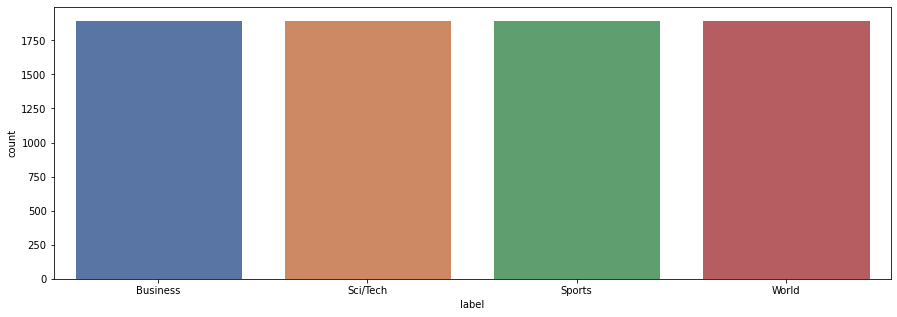

In [21]:
import seaborn as sns
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='label', ax=ax)

#Step 6 :  Distribution of the length of string by Label

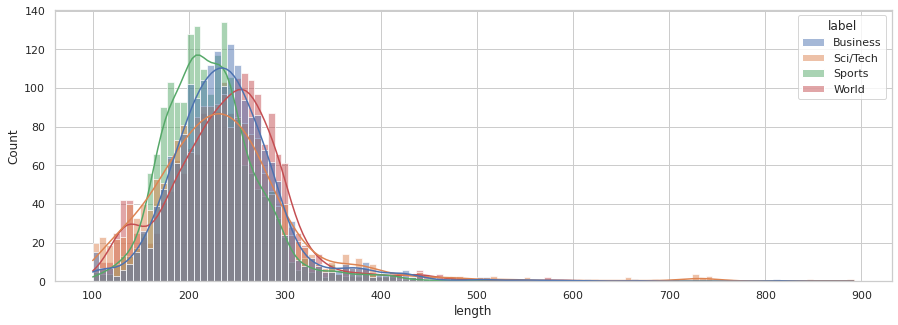

In [22]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")
sns.histplot(data=df,x='length', kde=True, hue='label', ax=ax)

# Step 7 : Average length of each label

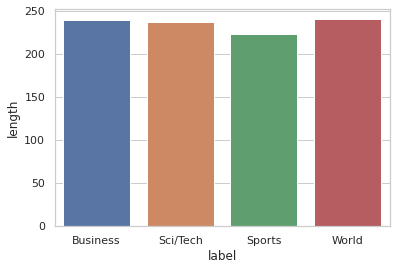

In [23]:
df_average = df.groupby(by=["label"]).mean().reset_index()
sns.barplot(data=df_average, x="label", y="length")

In [24]:
# !python -m spacy download en_core_web_sm

In [25]:
# Importing spacy

import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [26]:
df_grouped=df[['label','lemmatized']].groupby(by='label').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
label,
Business,fear t n pension talk union represent worker t...
Sci/Tech,race second private team set launch date human...
Sports,giddy phelps touch gold time michael phelps wi...
World,sister man die vancouver police custody slam c...


# Step 8: Creating a word Cloud For each Label

In [27]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aakash,aan,aapl,aaron,ab,ababa,abandon,abare,abarrel,...,znamenskoye,zoellick,zombie,zone,zoo,zook,zoom,zurich,zvonareva,zwelinzima
label,,,,,,,,,,,,,,,,,,,,,
Business,2,0,1,0,0,0,0,3,0,2,...,0,1,0,6,0,0,0,3,0,0
Sci/Tech,0,0,0,3,1,0,0,2,0,0,...,0,0,1,0,5,0,3,0,0,0
Sports,1,1,0,0,6,3,0,3,1,0,...,0,0,0,3,0,6,0,4,2,0


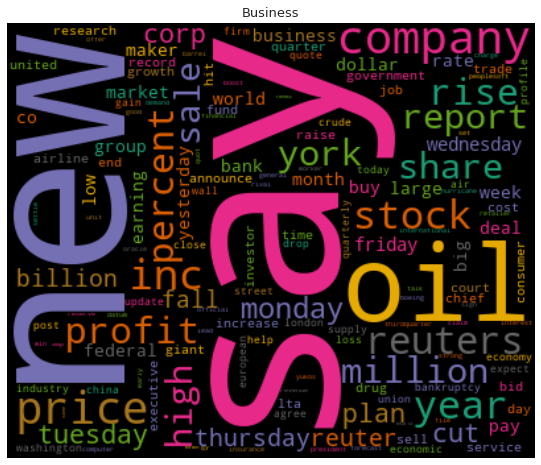

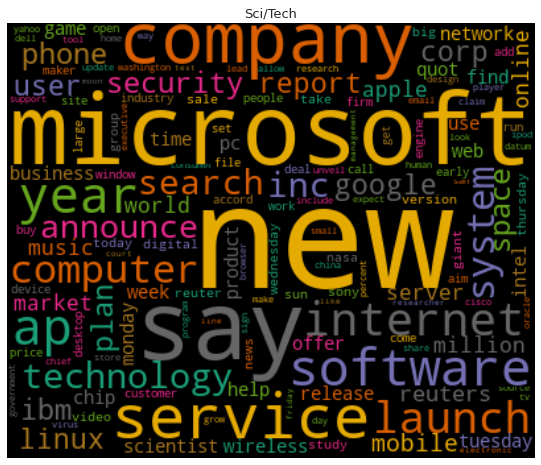

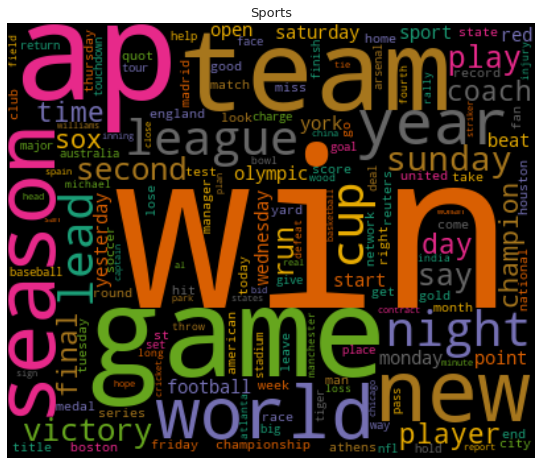

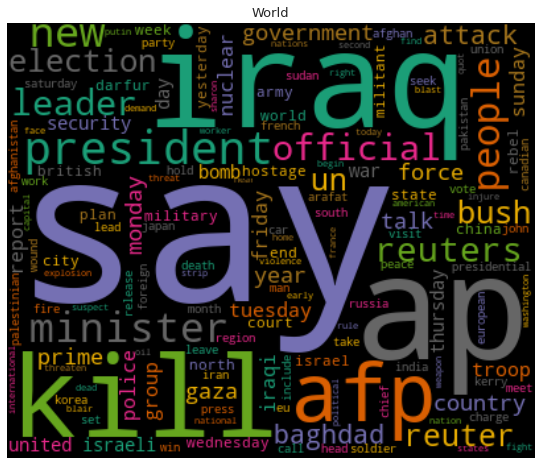

In [28]:

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

# Step 9 : Bigram Analysis

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
nltk.download('punkt')
def bigram(text):
    bigram = []
    tokens = nltk.word_tokenize(text)
    bigrams = nltk.bigrams(tokens)
    frequence = nltk.FreqDist(bigrams)
    for key,value in frequence.items():
        bigram.append(key)
    return bigram
df['no_stopword'] = df['cleaned'].apply(lambda x : ' '.join([i for i in x.split(' ') if i not in stopwords]))
df['bigram'] = df['no_stopword'].apply(lambda x : bigram(x))
bi_dict = {'Business':[], 'Sci/Tech':[], 'World':[], 'Sports':[]}
for label, bigram in zip(df['label'], df['bigram']):
    for i in bigram:
        bi_dict[label].append(i)
def top_10_bigram(label):
    count_freq = {}
    for item in bi_dict[label]:
        if item in count_freq:
            count_freq[item] +=1
        else:
            count_freq[item] = 1
            
    sorted_two_grams = sorted(count_freq.items(), key=lambda item: item[1], reverse = True)
    return pd.DataFrame(sorted_two_grams[:10], columns=[f'{label} Bigram', 'Count'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
top_10_bigram('Business'),'-'*30, top_10_bigram('World'),'-'*30, top_10_bigram('Sci/Tech'),'-'*30, top_10_bigram('Sports')

(       Business Bigram  Count
 0          (new, york)    187
 1        (oil, prices)    117
 2      (york, reuters)    117
 3        (reuters, us)     65
 4   (reuters, reuters)     63
 5       (wall, street)     56
 6     (quote, profile)     56
 7  (profile, research)     56
 8           (inc, lta)     51
 9     (united, states)     47,
 '------------------------------',
          World Bigram  Count
 0            (ap, ap)    192
 1          (afp, afp)    124
 2   (prime, minister)    123
 3  (reuters, reuters)     87
 4   (president, bush)     70
 5   (officials, said)     57
 6    (united, states)     51
 7   (united, nations)     51
 8      (north, korea)     44
 9    (yasser, arafat)     41,
 '------------------------------',
        Sci/Tech Bigram  Count
 0             (ap, ap)     92
 1   (reuters, reuters)     79
 2    (microsoft, corp)     51
 3  (operating, system)     39
 4     (search, engine)     29
 5     (san, francisco)     28
 6      (mobile, phone)     28
 7       

# Insights
- We have data with 4 labels sports, business, world and sci/tech
- The data is perfectly balanced and doesnot contain any duplicates and null values
- The range of length of text is between 100 to 500. There are some outliers that goes beyond.
- The word cloud and bigram shows the results as expected. Each category carries words form their respective domain. The tread from each label show following :
    1. Sci/Tech - The news mostly talks about the developments in Microsoft company and the softwares in general
    2. World - The most talked location in this is Iraq. The overall sentiment of the pool is negative. 
    3. Business - Most of the news belong to newyork, oil prices and stock. The maximum news comes out of USA
    4. Sports - The news is localize to the east coast of the united states and talk about olypmics and football. 